# Exploratory Data Analysis:

# Aspiring Mind Employment Outcome 2015 (AMEO):

## Data Description:

- **The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO).**
- **The study is primarily limited  only to students with engineering disciplines.**
- **The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills.**
- **The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points.**
- **The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate.** 



## Objective:

- To import the data and extract basic information
- Find outliers 
- To perform univariate and bivariate analysis and take down observations
- To test the data based on research questions 
- Make conclusions based on observations

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from scipy.stats import norm

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
am_df = pd.read_excel('aspiring_minds_employability_outcomes_2015.xlsx')

In [21]:
am_df


,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.300,...,-1,-1,-1,-1,-1,0.974,0.813,0.527,1.355,-0.446
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.400,...,-1,-1,-1,-1,-1,-0.734,0.379,1.240,-0.108,0.864
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.000,...,-1,-1,-1,-1,-1,0.272,1.711,0.164,-0.868,0.672
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.600,...,-1,-1,-1,-1,-1,0.046,0.345,-0.344,-0.408,-0.919
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.000,...,-1,-1,-1,-1,-1,-0.881,-0.279,-1.070,0.092,-0.130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,train,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.090,...,-1,-1,-1,-1,-1,-0.108,0.345,0.237,0.650,-0.919
3994,train,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.000,...,-1,-1,-1,-1,-1,-0.303,0.878,0.932,0.780,-0.094
3995,train,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.860,...,-1,-1,-1,-1,-1,-1.577,-1.527,-1.505,-1.318,-0.761
3996,train,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.720,...,438,-1,-1,-1,-1,-0.159,0.046,-0.451,-0.361,-0.094


In [22]:
am_df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [23]:
print(am_df.shape)

am_df.head()

(3998, 39)


,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.300,...,-1,-1,-1,-1,-1,0.974,0.813,0.527,1.355,-0.446
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.400,...,-1,-1,-1,-1,-1,-0.734,0.379,1.240,-0.108,0.864
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.000,...,-1,-1,-1,-1,-1,0.272,1.711,0.164,-0.868,0.672
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.600,...,-1,-1,-1,-1,-1,0.046,0.345,-0.344,-0.408,-0.919
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.000,...,-1,-1,-1,-1,-1,-0.881,-0.279,-1.070,0.092,-0.130


In [24]:
am_df.tail()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
3993,train,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.090,...,-1,-1,-1,-1,-1,-0.108,0.345,0.237,0.650,-0.919
3994,train,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.000,...,-1,-1,-1,-1,-1,-0.303,0.878,0.932,0.780,-0.094
3995,train,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.860,...,-1,-1,-1,-1,-1,-1.577,-1.527,-1.505,-1.318,-0.761
3996,train,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.720,...,438,-1,-1,-1,-1,-0.159,0.046,-0.451,-0.361,-0.094
3997,train,324966,400000,2013-02-01,present,senior systems engineer,Chennai,f,1991-02-26,70.600,...,-1,-1,-1,-1,-1,-1.113,-0.279,-0.634,1.326,-0.604


In [25]:
am_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [26]:
am_df.describe(include='all')

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3998,3998.000,3998.000,3998,3998,3998,3998,3998,3998,3998.000,...,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000
unique,1,NaN,NaN,81,67,419,339,2,1872,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,train,NaN,NaN,2014-07-01 00:00:00,present,software engineer,Bangalore,m,1991-01-01 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3998,NaN,NaN,199,1875,539,627,3041,11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,1991-06-01 00:00:00,NaN,NaN,NaN,NaN,1977-10-30 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2015-12-01 00:00:00,NaN,NaN,NaN,NaN,1997-05-27 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,663794.541,307699.850,NaN,NaN,NaN,NaN,NaN,NaN,77.925,...,90.742,22.975,16.479,31.851,2.684,-0.038,0.146,0.003,-0.169,-0.138
std,NaN,363218.246,212737.500,NaN,NaN,NaN,NaN,NaN,NaN,9.850,...,175.273,98.123,87.586,104.853,36.659,1.029,0.942,0.951,1.008,1.008
min,NaN,11244.000,35000.000,NaN,NaN,NaN,NaN,NaN,NaN,43.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-4.127,-5.782,-4.601,-2.643,-7.376
25%,NaN,334284.250,180000.000,NaN,NaN,NaN,NaN,NaN,NaN,71.680,...,-1.000,-1.000,-1.000,-1.000,-1.000,-0.714,-0.287,-0.605,-0.868,-0.669


In [27]:
pd.set_option('display.float_format',lambda x:'%.3f' % x)

In [28]:
am1 = am_df.describe()
am1

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,...,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000
mean,663794.541,307699.850,77.925,2008.088,74.466,5156.851,1.926,71.486,5156.851,0.300,...,90.742,22.975,16.479,31.851,2.684,-0.038,0.146,0.003,-0.169,-0.138
std,363218.246,212737.500,9.850,1.654,11.000,4802.261,0.262,8.167,4802.261,0.458,...,175.273,98.123,87.586,104.853,36.659,1.029,0.942,0.951,1.008,1.008
min,11244.000,35000.000,43.000,1995.000,40.000,2.000,1.000,6.450,2.000,0.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-4.127,-5.782,-4.601,-2.643,-7.376
25%,334284.250,180000.000,71.680,2007.000,66.000,494.000,2.000,66.407,494.000,0.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-0.714,-0.287,-0.605,-0.868,-0.669
50%,639600.000,300000.000,79.150,2008.000,74.400,3879.000,2.000,71.720,3879.000,0.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,0.046,0.212,0.091,-0.234,-0.094
75%,990480.000,370000.000,85.670,2009.000,82.600,8818.000,2.000,76.328,8818.000,1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,0.703,0.813,0.672,0.526,0.502
max,1298275.000,4000000.000,97.760,2013.000,98.700,18409.000,2.000,99.930,18409.000,1.000,...,715.000,623.000,676.000,548.000,516.000,1.995,1.905,2.535,3.353,1.822


In [29]:
am_df.describe(include='object')

,Unnamed: 0,DOL,Designation,JobCity,Gender,10board,12board,Degree,Specialization,CollegeState
count,3998,3998,3998,3998,3998,3998,3998,3998,3998,3998
unique,1,67,419,339,2,275,340,4,46,26
top,train,present,software engineer,Bangalore,m,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Uttar Pradesh
freq,3998,1875,539,627,3041,1395,1400,3700,880,915


In [30]:
am_df.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [31]:
am_df.nunique()

Unnamed: 0                  1
ID                       3998
Salary                    177
DOJ                        81
DOL                        67
Designation               419
JobCity                   339
Gender                      2
DOB                      1872
10percentage              851
10board                   275
12graduation               16
12percentage              801
12board                   340
CollegeID                1350
CollegeTier                 2
Degree                      4
Specialization             46
collegeGPA               1282
CollegeCityID            1350
CollegeCityTier             2
CollegeState               26
GraduationYear             11
English                   111
Logical                   107
Quant                     138
Domain                    243
ComputerProgramming        79
ElectronicsAndSemicon      29
ComputerScience            20
MechanicalEngg             42
ElectricalEngg             31
TelecomEngg                26
CivilEngg 

In [33]:
am_df.groupby(['Designation']).count()

,Unnamed: 0,ID,Salary,DOJ,DOL,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
Designation,,,,,,,,,,,,,,,,,,,,,
.net developer,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
.net web developer,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
account executive,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
account manager,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
admin assistant,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
web designer and seo,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
web developer,54,54,54,54,54,54,54,54,54,54,...,54,54,54,54,54,54,54,54,54,54
web intern,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [45]:
state = am_df.groupby(['CollegeState']).count()
state

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
CollegeState,,,,,,,,,,,,,,,,,,,,,
Andhra Pradesh,225,225,225,225,225,225,225,225,225,225,...,225,225,225,225,225,225,225,225,225,225
Assam,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
Bihar,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
Chhattisgarh,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
Delhi,162,162,162,162,162,162,162,162,162,162,...,162,162,162,162,162,162,162,162,162,162
Goa,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Gujarat,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
Haryana,180,180,180,180,180,180,180,180,180,180,...,180,180,180,180,180,180,180,180,180,180
Himachal Pradesh,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16


In [35]:
am_df.groupby(['JobCity']).count()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
JobCity,,,,,,,,,,,,,,,,,,,,,
-1,461,461,461,461,461,461,461,461,461,461,...,461,461,461,461,461,461,461,461,461,461
Chennai,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Delhi,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Mumbai,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Pune,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
trivandrum,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
udaipur,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
vapi,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [15]:
# only year is retained from DOB column
am_df['DOB']=pd.to_datetime(am_df['DOB'])
am_df['Dyear']=am_df['DOB'].dt.year
am_df.drop(columns=['DOB'],axis=1,inplace=True)

am_df['12graduation']=pd.to_datetime(am_df['12graduation'])
am_df['12gyear']=am_df['12graduation'].dt.year
am_df.drop(columns=['12graduation'],axis=1,inplace=True)

am_df['GraduationYear']=pd.to_datetime(am_df['GraduationYear'])
am_df['gyear']=am_df['GraduationYear'].dt.year
am_df.drop(columns=['GraduationYear'],axis=1,inplace=True)

am_df['12GradAge']=abs(am_df['12gyear']-am_df['Dyear'])
am_df['GradAge']=abs(am_df['gyear']-am_df['Dyear'])

In [17]:
# finding null values
am_df.isin([-1, 'NaN']).sum()

Unnamed: 0                  0
ID                          0
Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                   461
Gender                      0
10percentage                0
10board                     0
12percentage                0
12board                     0
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier             0
CollegeState                0
English                     0
Logical                     0
Quant                       0
Domain                    246
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg                3956
conscientiousness           0
agreeableness               0
extraversi

# Univariate Analysis:

<AxesSubplot:title={'center':'Frequency dist of Gender'}>

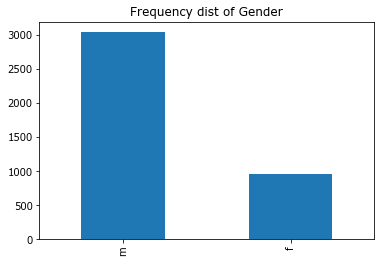

In [36]:
# frequency of gender
am_df['Gender'].value_counts().plot.bar(title='Frequency dist of Gender')

<AxesSubplot:title={'center':'Frequency dist of Designation'}>

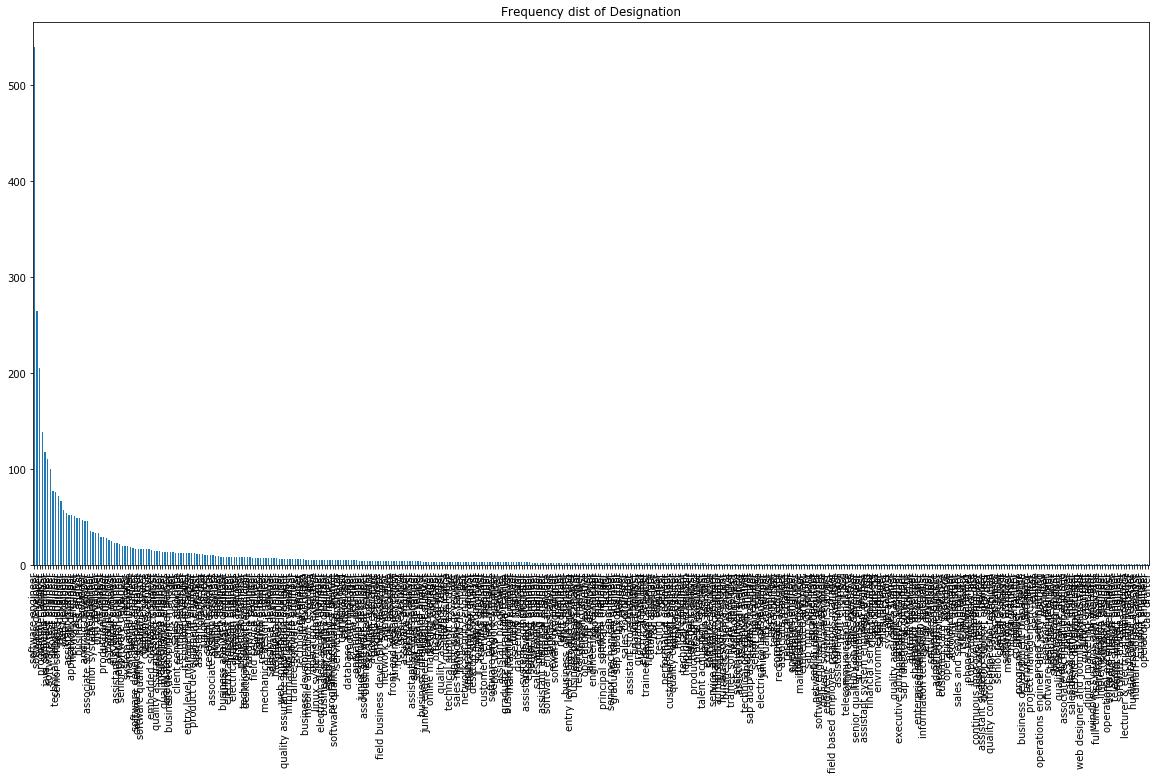

In [53]:
#Frequency dist of Designation
am_df['Designation'].value_counts().plot(kind = 'bar',title='Frequency dist of Designation' ,figsize = (20,10))

<AxesSubplot:>

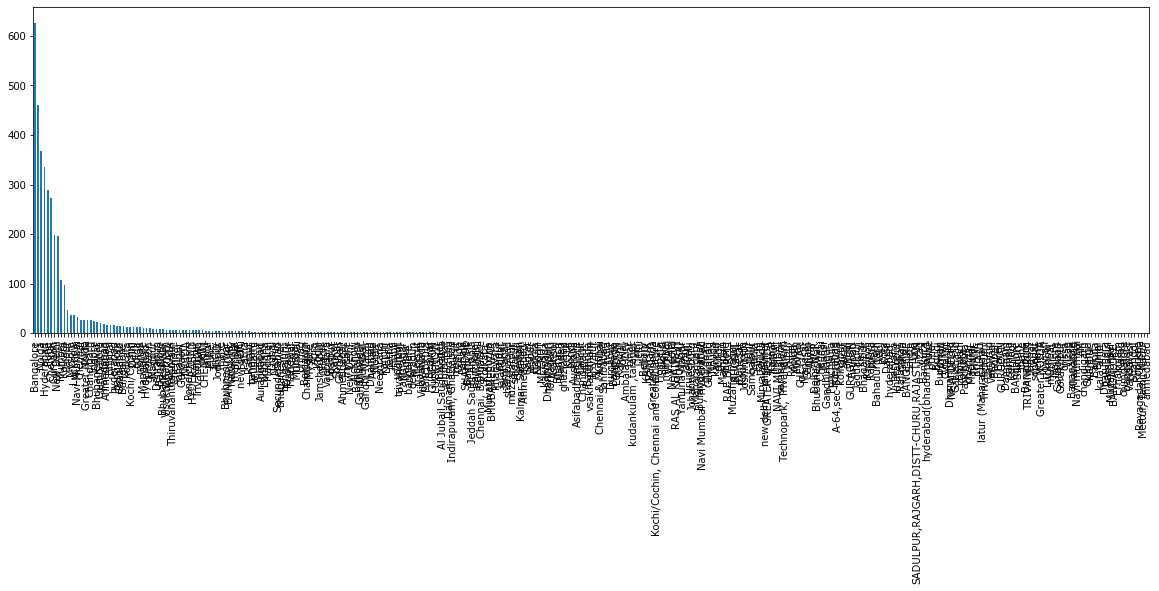

In [61]:
#barplot
am_df['JobCity'].value_counts().plot(kind = 'bar',figsize = (20,6))

<AxesSubplot:title={'center':'Frequency dist of CollegeState'}>

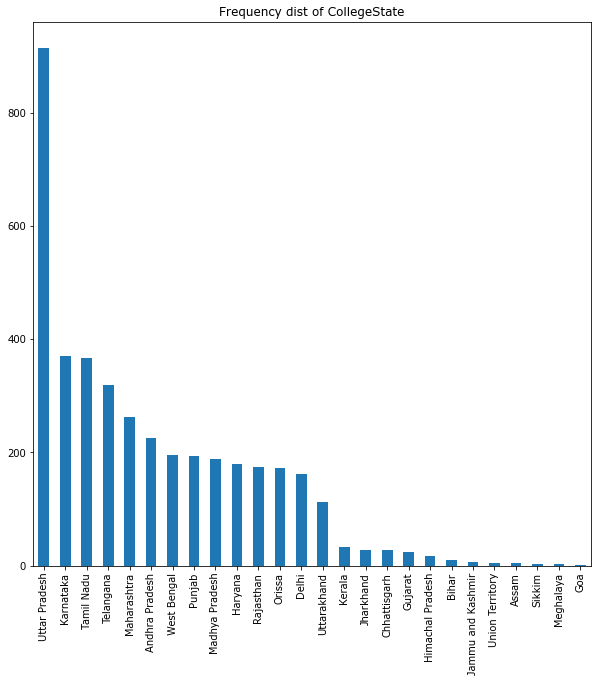

In [62]:
#Frequency dist of CollegeState
am_df['CollegeState'].value_counts().plot(kind = 'bar',title='Frequency dist of CollegeState' ,figsize = (10,10))

<AxesSubplot:title={'center':'Frequency dist of Specialization'}>

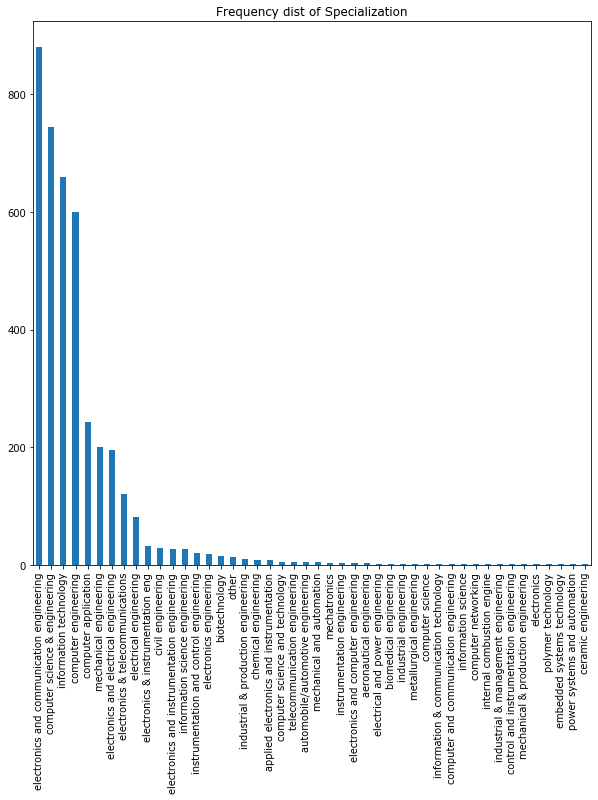

In [64]:
#Frequency dist of Specialization
am_df['Specialization'].value_counts().plot(kind = 'bar',title='Frequency dist of Specialization' ,figsize = (10,10))

<AxesSubplot:ylabel='Frequency'>

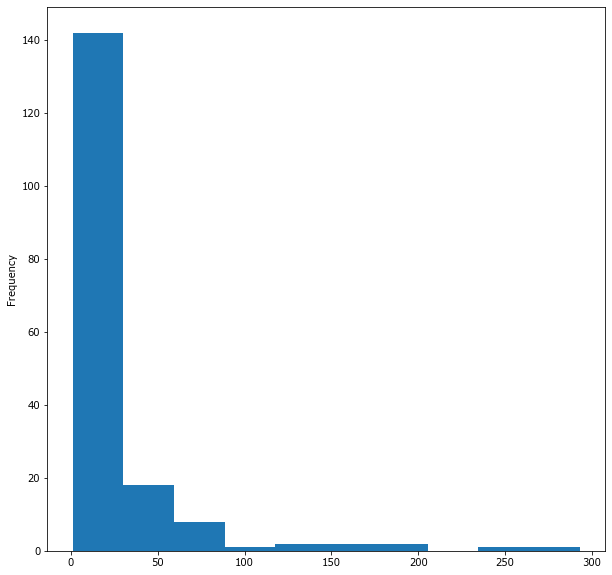

In [109]:
#frequency of salary
sal = am_df['Salary'].value_counts()
sal.plot(kind="hist",figsize=(10,10))

<function matplotlib.pyplot.show(close=None, block=None)>

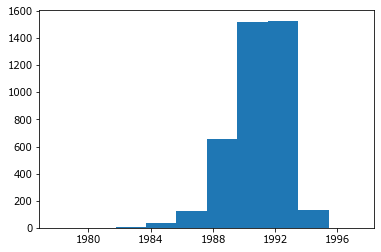

In [94]:
#frequency of date of birth
plt.hist(am_df['DOB'])
plt.show

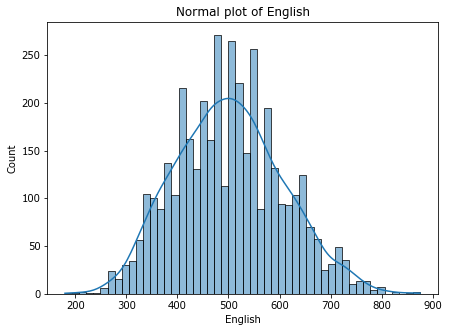

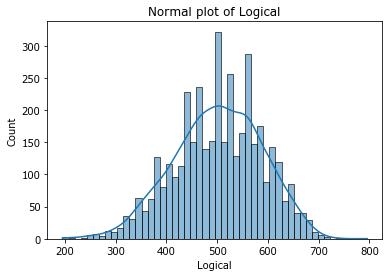

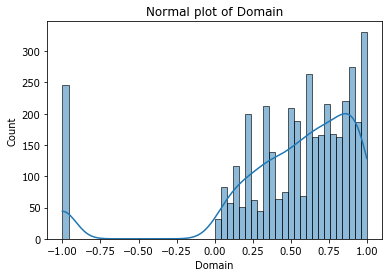

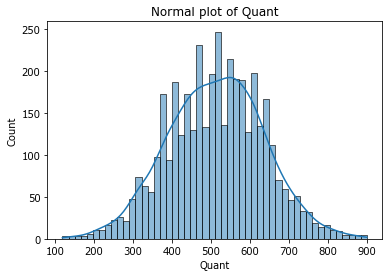

In [69]:
#AMCAT skills scores - histplot
plt.subplots(figsize=(7,5))
sns.histplot(am_df['English'], bins = 50, kde=True)
plt.title('Normal plot of English')
plt.show()
sns.histplot(am_df['Logical'], bins = 50, kde=True)
plt.title('Normal plot of Logical')
plt.show()
sns.histplot(am_df['Domain'], bins = 50, kde=True)
plt.title('Normal plot of Domain')
plt.show()
sns.histplot(am_df['Quant'], bins = 50, kde=True)
plt.title('Normal plot of Quant')
plt.show()

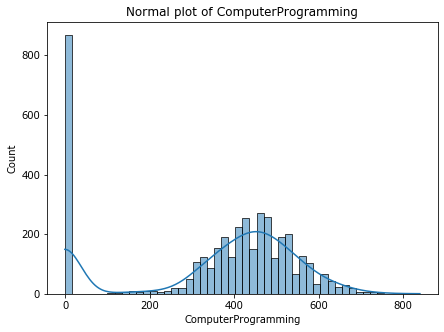

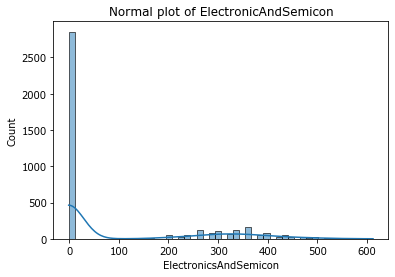

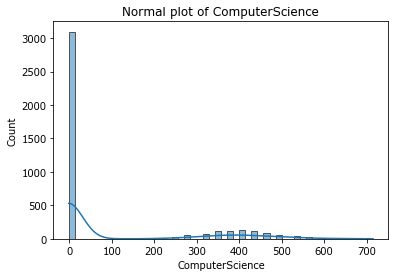

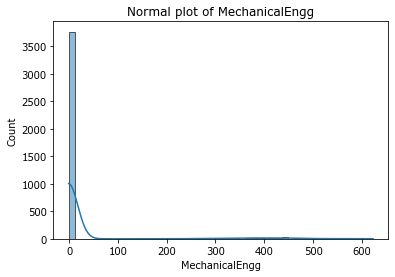

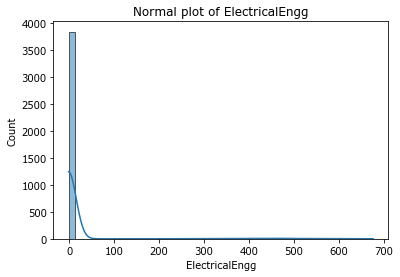

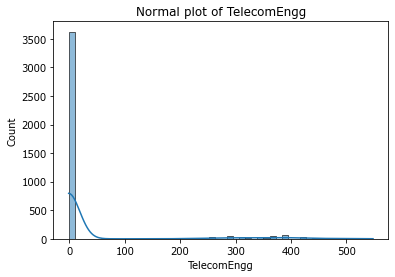

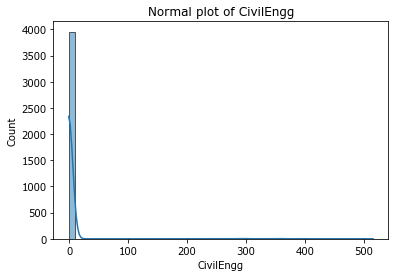

In [71]:
#AMCAT engineering section scores - histplot
plt.subplots(figsize=(7,5))
sns.histplot(am_df['ComputerProgramming'], bins = 50, kde=True)
plt.title('Normal plot of ComputerProgramming')
plt.show()
sns.histplot(am_df['ElectronicsAndSemicon'], bins = 50, kde=True)
plt.title('Normal plot of ElectronicAndSemicon')
plt.show()
sns.histplot(am_df['ComputerScience'], bins = 50, kde=True)
plt.title('Normal plot of ComputerScience')
plt.show()
sns.histplot(am_df['MechanicalEngg'], bins = 50, kde=True)
plt.title('Normal plot of MechanicalEngg')
plt.show()
sns.histplot(am_df['ElectricalEngg'], bins = 50, kde=True)
plt.title('Normal plot of ElectricalEngg')
plt.show()
sns.histplot(am_df['TelecomEngg'], bins = 50, kde=True)
plt.title('Normal plot of TelecomEngg')
plt.show()
sns.histplot(am_df['CivilEngg'], bins = 50, kde=True)
plt.title('Normal plot of CivilEngg')
plt.show()


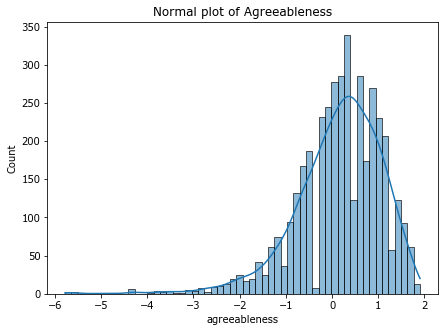

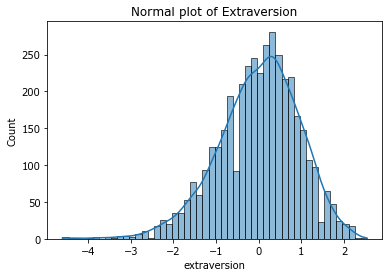

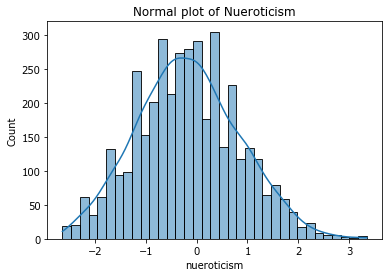

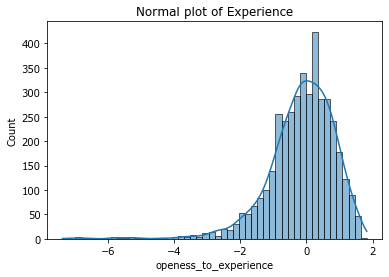

In [83]:
#AMCAT personality test scores - histplot
plt.subplots(figsize=(7,5))
sns.histplot(x = 'agreeableness', data = am_df, kde=True)
plt.title('Normal plot of Agreeableness')
plt.show()
sns.histplot(am_df['extraversion'], bins = 50, kde=True)
plt.title('Normal plot of Extraversion')
plt.show()
sns.histplot(x='nueroticism', data = am_df, kde=True)
plt.title('Normal plot of Nueroticism')
plt.show()
sns.histplot(am_df['openess_to_experience'], bins = 50, kde=True)
plt.title('Normal plot of Experience')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

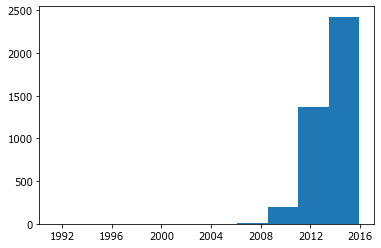

In [97]:
plt.hist(am_df['DOJ'])
plt.show

# Observations:
- Most of the students selected are males
- Most of the candidates are software engineers
- The city with most jobs is bangalore
- The students are mostly from colleges in Uttar Pradesh
-  Most of the candidates specialize in electronics and communication engineering
- Highest salary is 4000000. 
- Average salary is 307699.850	
- Most of the candidates were born in 1992-1994
- AMCAT skills scores distributions are all normal except for domain
- AMCAT engineering section scores are distributed same in all sections as right skewed. 
- AMCAT personality scores are mostly left skewed
- In the years 2014-2016 the candidates have joined the most


# Bivariate Analysis:

## Relationships between numerical columns:

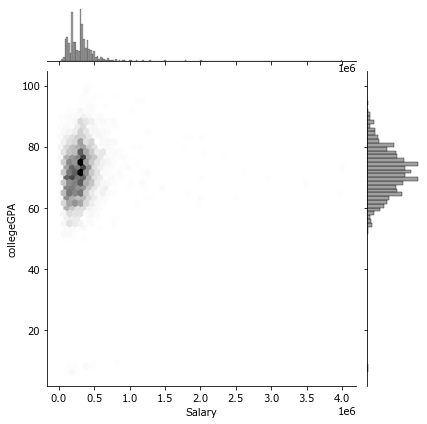

In [120]:
# Visualisation of salary based on collegeGPA
sns.jointplot(x='Salary', y='collegeGPA', data=am_df, kind='hex', color='grey')

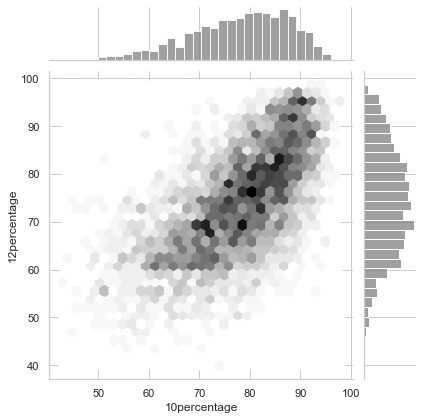

In [139]:
#Visualization of 10percentage and 12th percentage
sns.jointplot(x='10percentage', y='12percentage', data=am_df, kind='hex', color='grey')

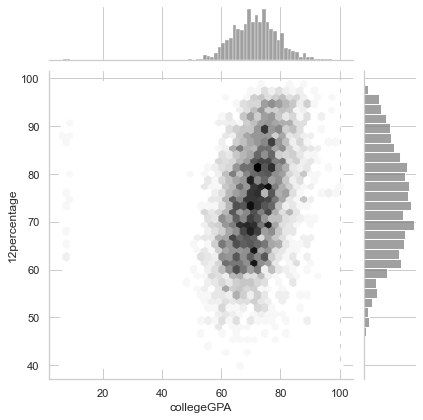

In [140]:
# visualiztion of college GPA and 12 percentage
sns.jointplot(x='collegeGPA', y='12percentage', data=am_df, kind='hex', color='grey')

## Patterns between categorical and numerical columns:

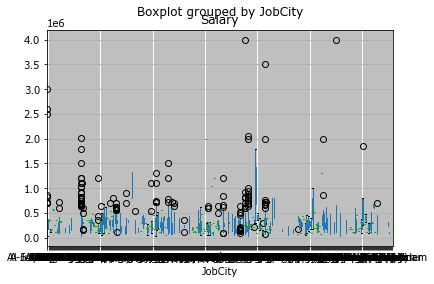

In [26]:
#visualization of pattern between salary and jobcity
am_df.boxplot(column='Salary', by='JobCity')
plt.show()

<AxesSubplot:xlabel='Salary', ylabel='Designation'>

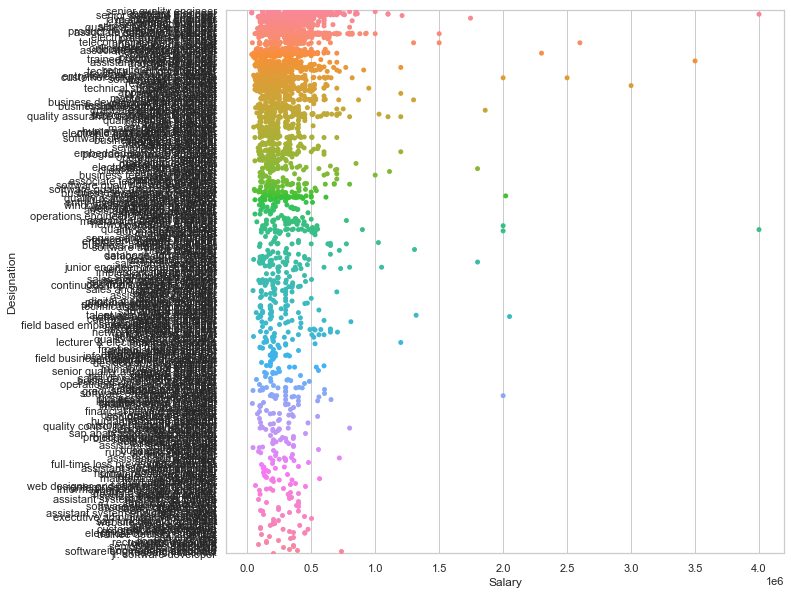

In [30]:
#visualization of pattern between salary and Designation
plt.subplots(figsize=(10,10))
sns.set(style="whitegrid")
sns.swarmplot(x='Salary', y='Designation', data=am_df)

<AxesSubplot:xlabel='Salary', ylabel='Gender'>

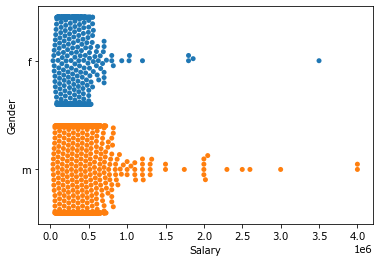

In [125]:
#visualization of pattern between salary and Gender
sns.set(style="whitegrid")
sns.swarmplot(x='Salary', y='Gender', data=am_df)

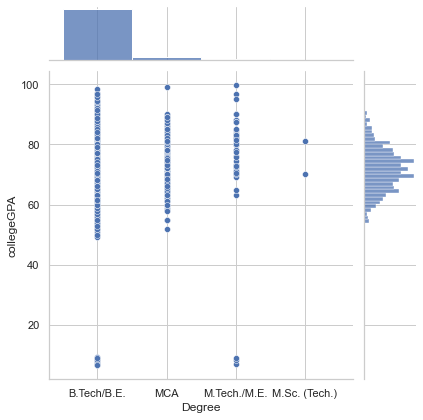

In [17]:
#visualization of pattern between Degree and CollegeGPA
sns.jointplot(x=am_df['Degree'], y=am_df['collegeGPA'], data = am_df, kind = 'scatter')

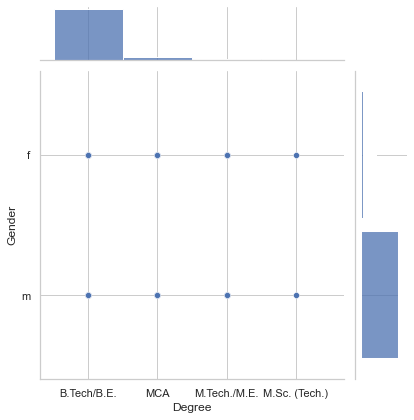

In [20]:
#visualization of pattern between Degree and Gender
sns.jointplot(x=am_df['Degree'], y=am_df['Gender'], data = am_df, kind = 'scatter')

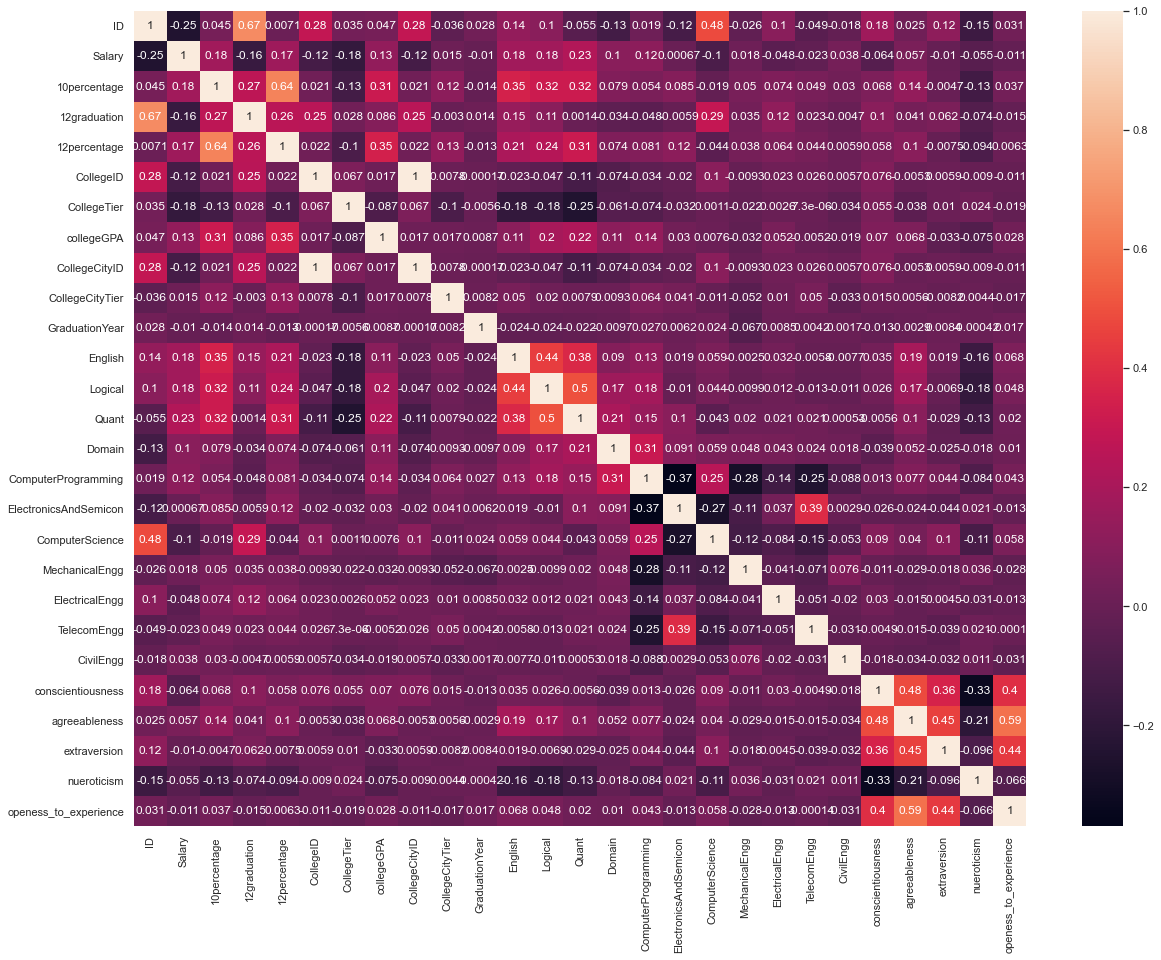

In [78]:
#Correlation between various columns
plt.figure(figsize=(20,15))
corrMatrix = am_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

<Figure size 432x288 with 0 Axes>

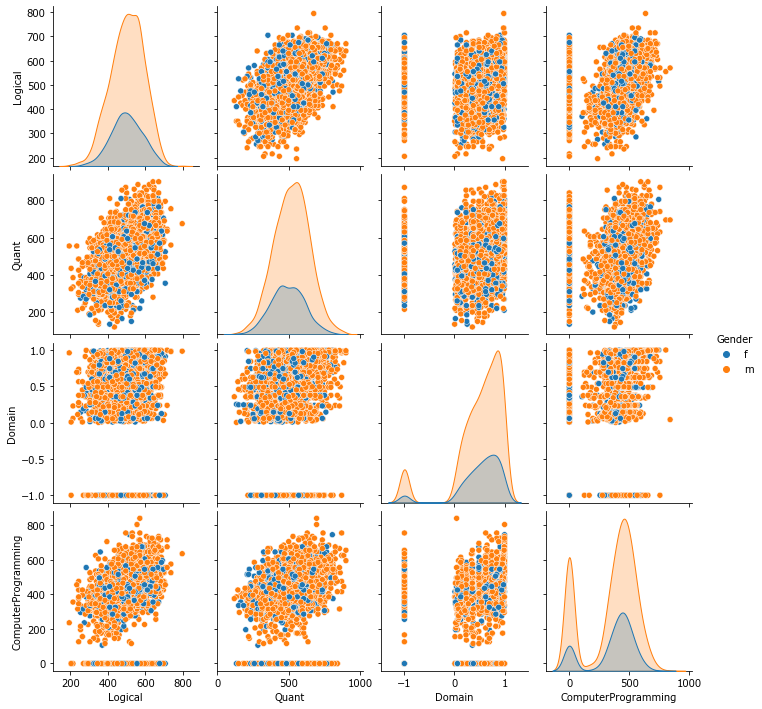

In [28]:
#Pair plot to vizualize pattern of AMCAT skills scores based on gender
plt.figure()
cols_to_plot = am_df.columns[21:25].tolist() + ['Gender'] 
sns.pairplot(am_df[cols_to_plot], hue ="Gender", diag_kind='kde' )
plt.show()

<Figure size 432x288 with 0 Axes>

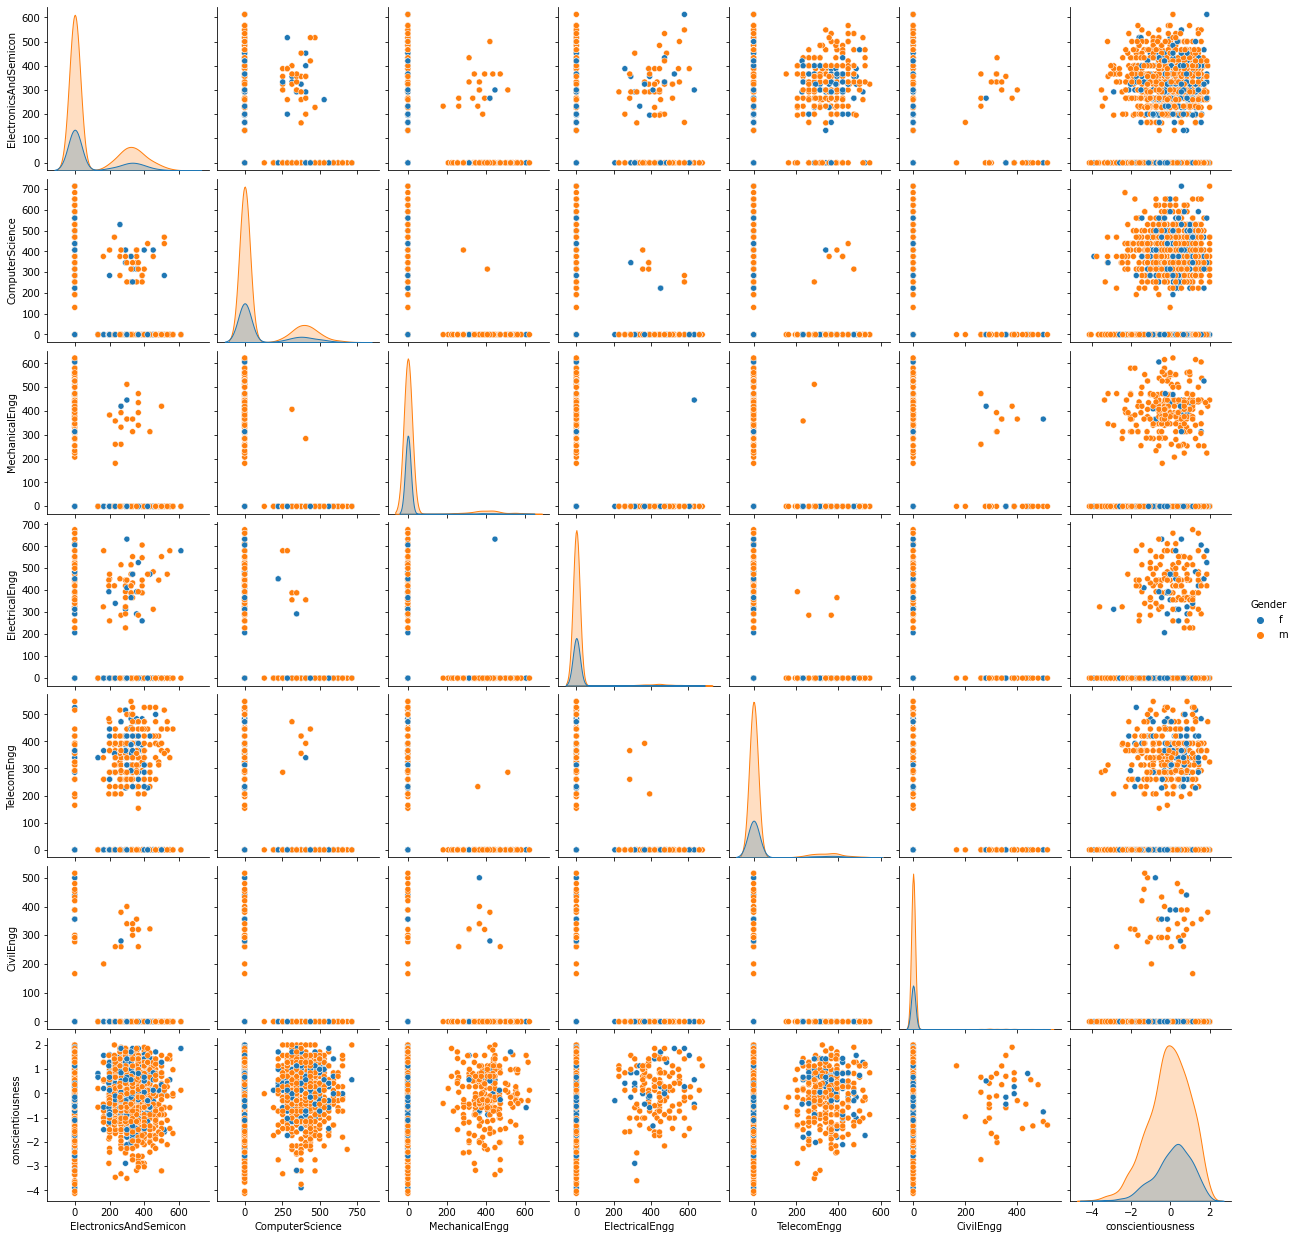

In [29]:
#Pair plot to vizualize pattern of AMCAT engineering section scores based on gender
plt.figure()
cols_to_plot = am_df.columns[25:32].tolist() + ['Gender'] 
sns.pairplot(am_df[cols_to_plot], hue ="Gender",diag_kind='kde' )
plt.show()

<Figure size 432x288 with 0 Axes>

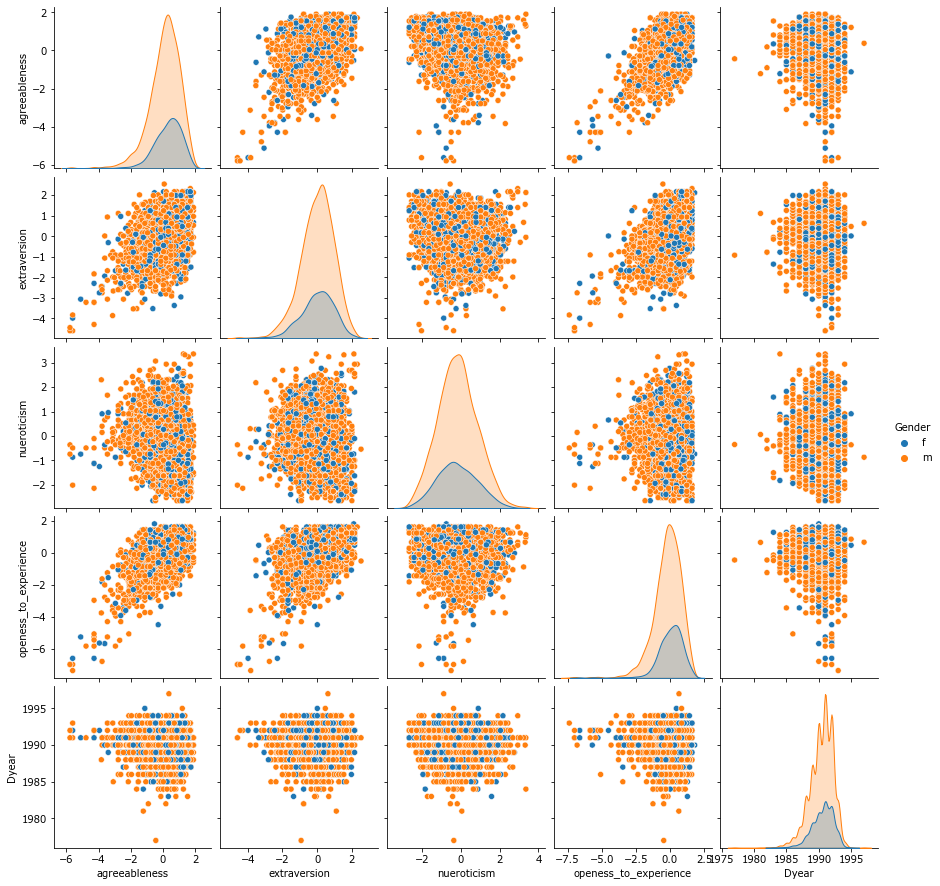

In [27]:
#Pair plot to vizualize pattern of AMCAT personality scores based on gender
plt.figure()
cols_to_plot = am_df.columns[32:37].tolist() + ['Gender'] 
sns.pairplot(am_df[cols_to_plot], hue ="Gender",diag_kind='kde' )
plt.show()

## Observations:
- The salary shows most to students with college GPA of 75%
- The canditates hired mostly scored 75% in 10th , 12th and college
- The salary doesnt vary depending on city 
- Senior quality engineers have high salary comparitively
- The salary is mostly same for both males and females except for few higher outliers are observed in male category. Indicating that salaries above normal are earned more by males.
- BTech/B.E students have more college GPA
- There are both male and female students equally in degree
- correlation map shows correlation between different columns in the data 
- In AMCAT skills scores both genders have almost same average
- In AMCAT engineering section scores males have more score
- In AMCAT personality scores test both genders have equal scores on average


 # Research Question:

####  Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.Is there a relationship between gender and specialisation? (i.e. Does the preference of Specialisation depend on the Gender?)



##### There are two parts in this question 
1. To test the claim between salary and specialization
2. To check if specialization depends on gender.

<AxesSubplot:xlabel='ComputerProgramming', ylabel='Salary'>

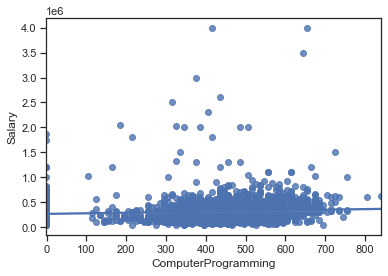

In [99]:
#positive correlation between salary and computer programming skills
sns.regplot(x='ComputerProgramming', y='Salary', data=am_df)

In [104]:
specialization_map = \
{'electronics and communication engineering' : 'EC',
 'computer science & engineering' : 'CS',
 'information technology' : 'CS' ,
 'computer engineering' : 'CS',
 'computer application' : 'CS',
 'mechanical engineering' : 'ME',
 'electronics and electrical engineering' : 'EC',
 'electronics & telecommunications' : 'EC',
 'electrical engineering' : 'EL',
 'electronics & instrumentation eng' : 'EC',
 'civil engineering' : 'CE',
 'electronics and instrumentation engineering' : 'EC',
 'information science engineering' : 'CS',
 'instrumentation and control engineering' : 'EC',
 'electronics engineering' : 'EC',
 'biotechnology' : 'other',
 'other' : 'other',
 'industrial & production engineering' : 'other',
 'chemical engineering' : 'other',
 'applied electronics and instrumentation' : 'EC',
 'computer science and technology' : 'CS',
 'telecommunication engineering' : 'EC',
 'mechanical and automation' : 'ME',
 'automobile/automotive engineering' : 'ME',
 'instrumentation engineering' : 'EC',
 'mechatronics' : 'ME',
 'electronics and computer engineering' : 'CS',
 'aeronautical engineering' : 'ME',
 'computer science' : 'CS',
 'metallurgical engineering' : 'other',
 'biomedical engineering' : 'other',
 'industrial engineering' : 'other',
 'information & communication technology' : 'EC',
 'electrical and power engineering' : 'EL',
 'industrial & management engineering' : 'other',
 'computer networking' : 'CS',
 'embedded systems technology' : 'EC',
 'power systems and automation' : 'EL',
 'computer and communication engineering' : 'CS',
 'information science' : 'CS',
 'internal combustion engine' : 'ME',
 'ceramic engineering' : 'other',
 'mechanical & production engineering' : 'ME',
 'control and instrumentation engineering' : 'EC',
 'polymer technology' : 'other',
 'electronics' : 'EC'}

['CS' 'EC' 'ME' 'EL' 'CE' 'other']


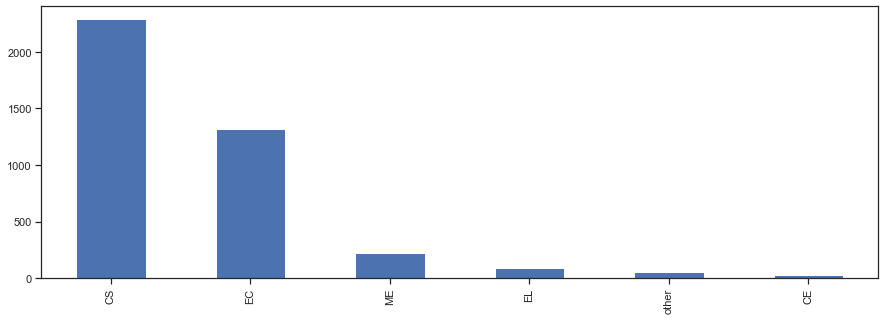

In [106]:
am_df['Specialization'] = am_df['Specialization'].map(specialization_map)

am_df['Specialization'].value_counts().plot(kind='bar', figsize=(15,5))

print(am_df['Specialization'].unique())

## Observation:
- There is positive correlation between salary and computer programming skills
- It is observed that CS department has many outliers indicating higher salaries are earned by those of CS specializaton
- The median salary of EC dept is higher than others.

In [88]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency

**Lets make a bold Claim that Gender and Specialization are dependent.**

Step - 1:
i.e. Alternate Hypothesis:$$ H_1: They \ are \ Dependent $$and Null Hypothesis:$$ H_0: They \ are \ Independent $$

Step - 2:

- Collect the sample of size n
- Compute the sample frequencies

Step - 3: 
Compute $ \chi^2 $ test statistic
Now you need to check, if the difference in the observed and expected frequencies is too extreme to reject the NULL hypothesis.

- Have a look at Observed Frequencies (in the sample)
- Compute the Expected Frequencies (under null hyp assumption)$$ Expected \ Value = \frac{row \ total * col \ total}{grand \ total}$$Now, test statistic can be computed using below mentioned formula:
$$ \chi^2 = \Sigma \frac{(o-e)^2}{e} $$

Step - 4: Decide $ \alpha $ and $ df = (rows-1)(cols-1) $

Step - 5: Apply decision rule

Chi Square Test

$$ if \ \chi^2 \gt \chi^2_{df, \alpha} \Rightarrow Reject H_0 $$

p-value Test: $$ p \ value = (1.0 - cdf(test \ statistic)) $$

Now,  
$$ if (p \ value \lt \alpha) \Rightarrow Accept H_1 \ or \ Reject H_0 $$

In [85]:
#step 2-freqency distribution
pd.crosstab(am_df.Specialization, am_df.Gender, margins=True)

Gender,f,m,All
Specialization,,,
aeronautical engineering,1,2,3
applied electronics and instrumentation,2,7,9
automobile/automotive engineering,0,5,5
biomedical engineering,2,0,2
biotechnology,9,6,15
ceramic engineering,0,1,1
chemical engineering,1,8,9
civil engineering,6,23,29
computer and communication engineering,0,1,1


In [86]:
# observed frequencies
observed = pd.crosstab(am_df['Specialization'], am_df['Gender'])
observed

Gender,f,m
Specialization,,
aeronautical engineering,1,2
applied electronics and instrumentation,2,7
automobile/automotive engineering,0,5
biomedical engineering,2,0
biotechnology,9,6
ceramic engineering,0,1
chemical engineering,1,8
civil engineering,6,23
computer and communication engineering,0,1


In [89]:
# chi2_contigency returns chi2 test statistic, p-value, degree of freedoms, expected frequencies

chi2_contingency(observed)

(104.46891913608454,
 1.2453868176977011e-06,
 45,
 array([[7.18109055e-01, 2.28189095e+00],
        [2.15432716e+00, 6.84567284e+00],
        [1.19684842e+00, 3.80315158e+00],
        [4.78739370e-01, 1.52126063e+00],
        [3.59054527e+00, 1.14094547e+01],
        [2.39369685e-01, 7.60630315e-01],
        [2.15432716e+00, 6.84567284e+00],
        [6.94172086e+00, 2.20582791e+01],
        [2.39369685e-01, 7.60630315e-01],
        [5.84062031e+01, 1.85593797e+02],
        [1.43621811e+02, 4.56378189e+02],
        [2.39369685e-01, 7.60630315e-01],
        [4.78739370e-01, 1.52126063e+00],
        [1.78091046e+02, 5.65908954e+02],
        [1.43621811e+00, 4.56378189e+00],
        [2.39369685e-01, 7.60630315e-01],
        [4.78739370e-01, 1.52126063e+00],
        [1.96283142e+01, 6.23716858e+01],
        [2.39369685e-01, 7.60630315e-01],
        [7.65982991e+00, 2.43401701e+01],
        [2.89637319e+01, 9.20362681e+01],
        [2.10645323e+02, 6.69354677e+02],
        [7.18109055e-01, 

In [90]:
# Computing chi2 test statistic, p-value, degree of freedoms

chi2_test_stat = chi2_contingency(observed)[0]
pval = chi2_contingency(observed)[1]
df = chi2_contingency(observed)[2]

In [91]:
confidence_level = 0.90

alpha = 1 - confidence_level

chi2_critical = chi2.ppf(1 - alpha, df)

chi2_critical

57.50530474499599

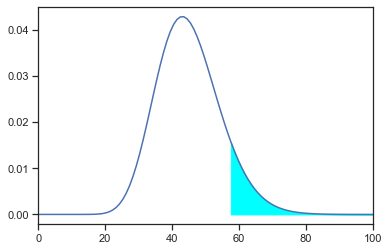

In [97]:
# Ploting the chi2 distribution to visualise

# Defining the x minimum and x maximum
x_min = 0
x_max = 100

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = chi2.pdf(x, df)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Setting Chi2 Critical value 
chi2_critical_right = chi2_critical

# Shading the right rejection region
x1 = np.linspace(chi2_critical_right, x_max, 100)
y1 = chi2.pdf(x1, df)
plt.fill_between(x1, y1, color='cyan')

In [93]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


In [94]:
if(pval < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


## Observation :
- The specialization and Gender are both dependent

# Conclusion:

- The given data set have 3998 rows × 39 columns
- The highest salary is 4000000 and average salary is 307699.850
- With Univariate analysis we understand the frequency distribution of each categorical Variable/Column and  probability and frequency distribution of each numerical column
- With Binary analysis we discover the relationships between numerical columns and identify the patterns between categorical and numerical columns
- Using Research question we test the data 
     - Using one hot encoding we find that there is positive correlation between salary and computer programming skills
     - It is observed that CS department has many outliers indicating higher salaries are earned by those of CS specializaton
    
     - Using Chi - Square test it is observed that the specialization is dependent on Gender
